In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
import csv

def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
#         labels = []
#         images = []
#         readCSV = csv.reader(training_file, delimiter = ',')
        
#         for row in readCSV:
#             labels.append(row[0])
#             images.append(row[1:785])
#         labels = labels[1:]
#         labels = np.asarray(labels)
#         labels = labels.astype(np.float)
        
#         images = images[1:]
#         images = np.asarray(images)
# #         print(images[1].shape)
#         images = images.astype(np.float)
#         temp = []
#         for image in images:
#             temp.append(np.array_split(image, 28))
        
#         images = np.asarray(temp)
        my_arr = np.loadtxt(filename, delimiter=',', skiprows=1)
    
        #get labels and image data
        labels = my_arr[:,0].astype('int')
        images = my_arr[:,1:]
    
        #reshaping the images
        images = images.astype('float').reshape(images.shape[0], 28,28)

        
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = training_images[:,:,:,np.newaxis]
testing_images = testing_images[:,:,:,np.newaxis]

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale= 1./255,
    horizontal_flip=True,
    )

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale= 1./255,)



    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D output 25
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()

#1st Conv2D
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))

#2nd Conv2D
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=26, activation='softmax'))

# Compile Model. 
model.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

# Train the Model
history = model.fit_generator(train_generator,
                             epochs=2,
                   validation_data = validation_generator)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
429/429 [==============================] - 28s 65ms/step - loss: 1.4309 - accuracy: 0.5689 - val_loss: 0.8852 - val_accuracy: 0.7135
Epoch 2/2
429/429 [==============================] - 23s 55ms/step - loss: 0.2484 - accuracy: 0.9301 - val_loss: 0.5687 - val_accuracy: 0.8256


[124.51423976917341, 0.76645285]

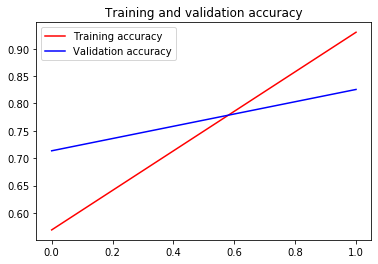

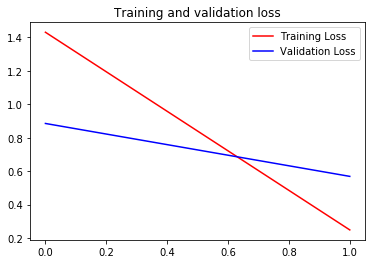

In [5]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [6]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [7]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);